<a href="https://colab.research.google.com/github/Renad-CAI/T5_Labs/blob/main/Lab_exam_week_5_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# # Here is a helping code that will download and unzip the dataset for you.
# # Once you download the dataset you may comment the code!
# !kaggle datasets download -d khaledzsa/traffic-dataset
# !unzip traffic-dataset.zip

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Traffic Data.csv', parse_dates= ['date_time'])
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       19980 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,date_time
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000,20000
mean,3278.186887,281.162680,0.048396,0.0,49.384600,2017-10-22 04:13:17.939999744
min,113.000000,243.390000,0.000000,0.0,0.000000,2016-11-18 15:00:00
25%,1228.750000,271.950000,0.000000,0.0,1.000000,2017-04-30 14:45:00
50%,3430.000000,281.825000,0.000000,0.0,75.000000,2017-10-21 07:30:00
75%,4928.000000,291.840000,0.000000,0.0,90.000000,2018-04-13 21:00:00
max,16781.000000,310.070000,10.600000,0.0,92.000000,2018-09-30 23:00:00
std,1977.171357,12.661288,0.398007,0.0,39.647341,NaN


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [6]:
df = df.sort_values(by= 'date_time')

In [7]:
df = df.reset_index()

In [8]:
df.head()

,index,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00
1,4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00
2,14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00
3,8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00
4,3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00


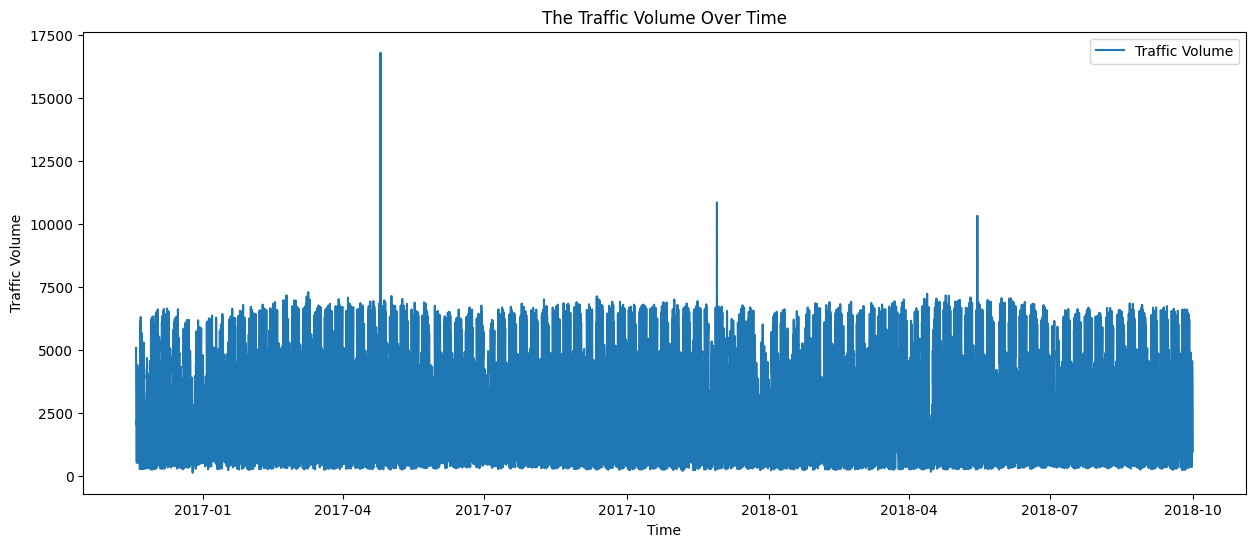

In [9]:
plt.figure(figsize= (15, 6))
plt.plot(df['date_time'], df['traffic_volume'], label= 'Traffic Volume')
plt.title('The Traffic Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

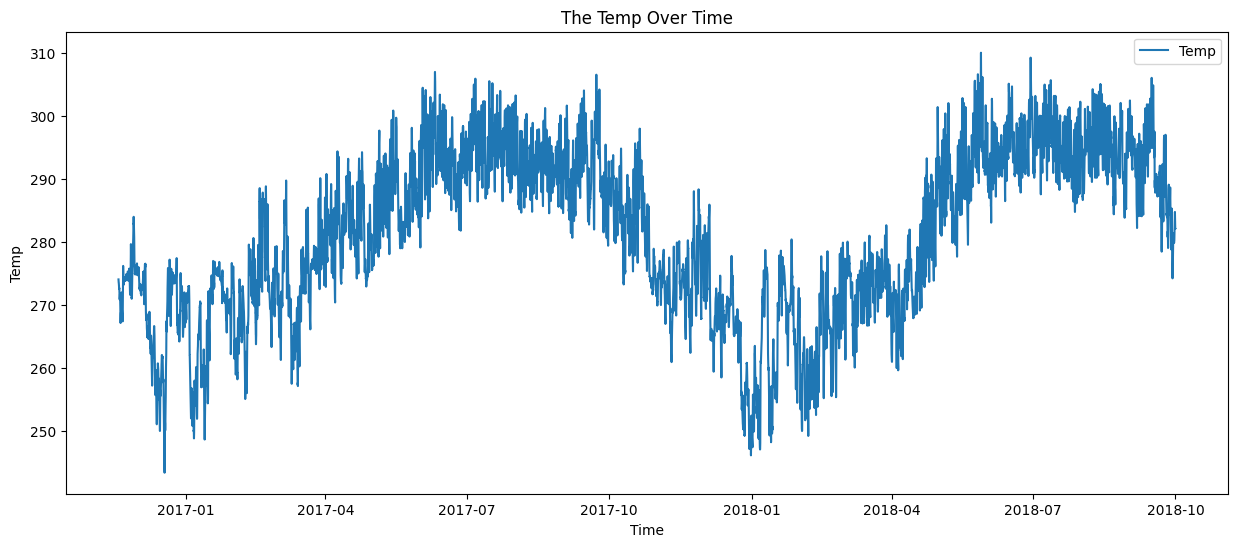

In [10]:
plt.figure(figsize= (15, 6))
plt.plot(df['date_time'], df['temp'], label= 'Temp')
plt.title('The Temp Over Time')
plt.xlabel('Time')
plt.ylabel('Temp')
plt.legend()
plt.show()

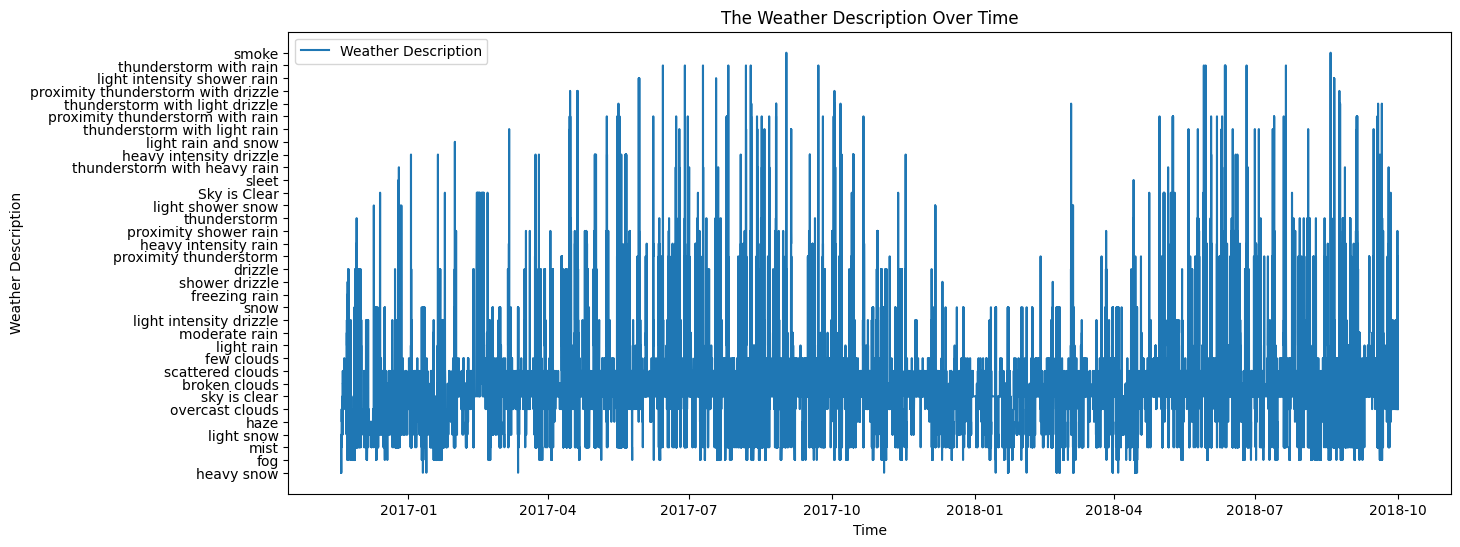

In [11]:
plt.figure(figsize= (15, 6))
plt.plot(df['date_time'], df['weather_description'], label= 'Weather Description')
plt.title('The Weather Description Over Time')
plt.xlabel('Time')
plt.ylabel('Weather Description')
plt.legend()
plt.show()

In [12]:
df.isnull().sum()

,0
index,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [13]:
df['traffic_volume'] = df['traffic_volume'].fillna(df['traffic_volume'].mean())

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df['traffic_volume'], model= 'additive', period= 365)

trend = decompose.trend
seasonal = decompose.seasonal
error = decompose.resid

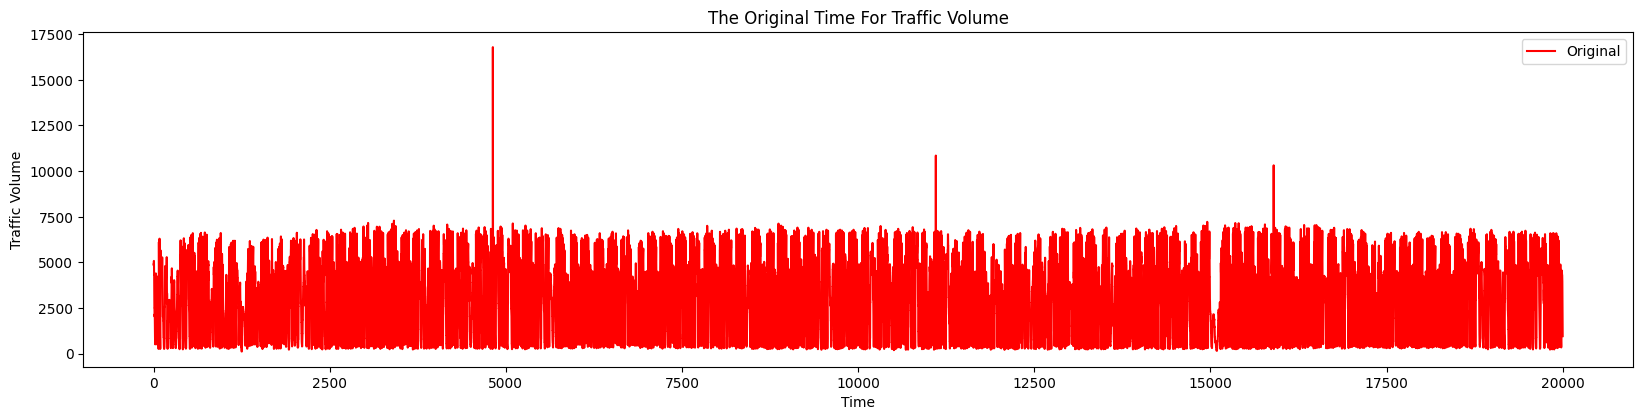

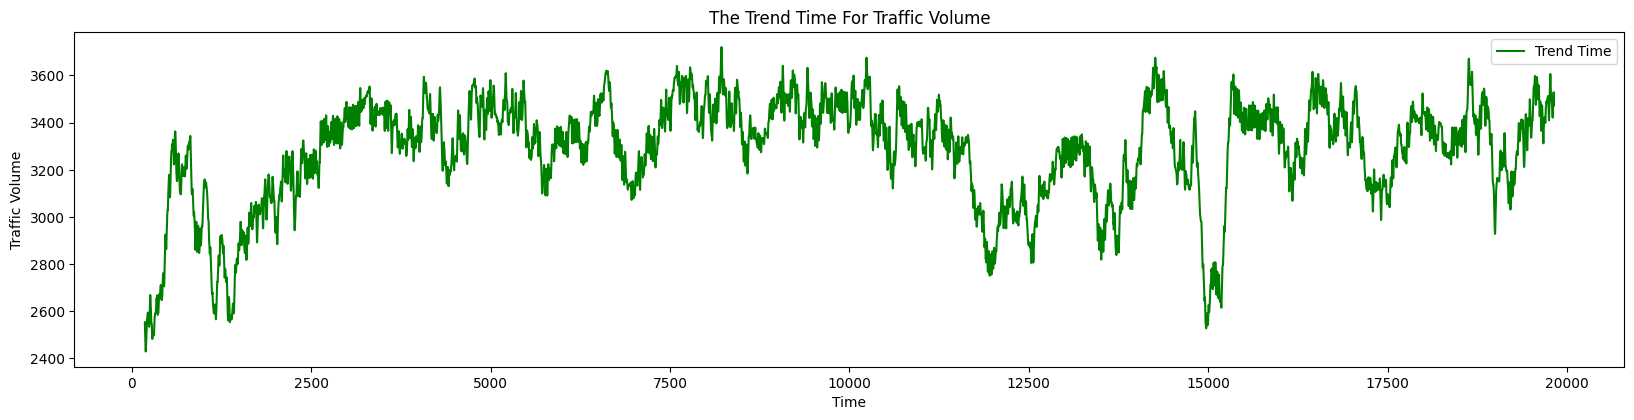

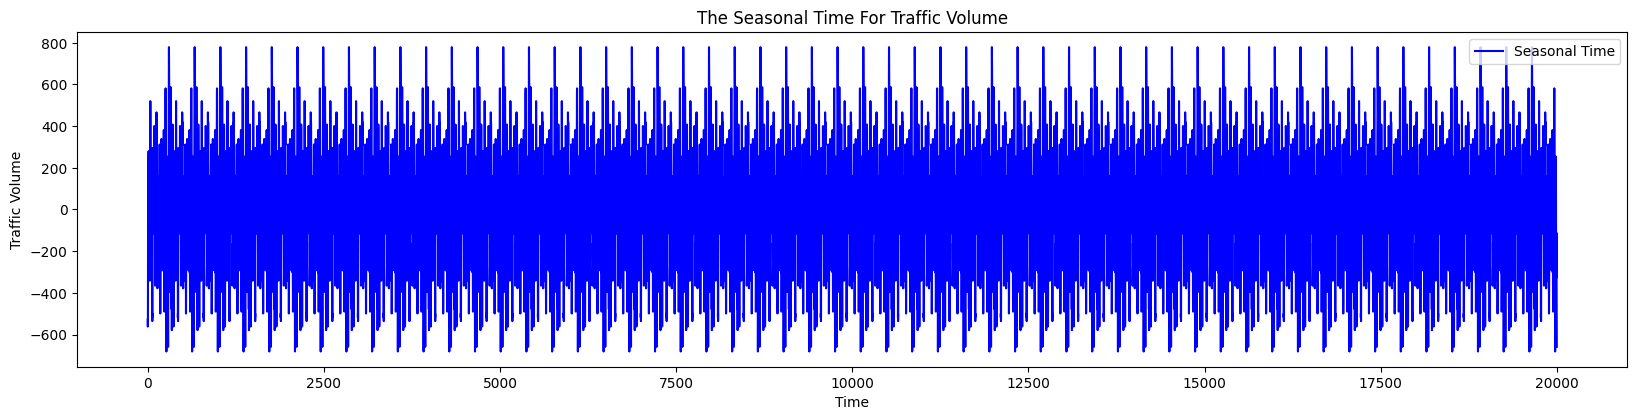

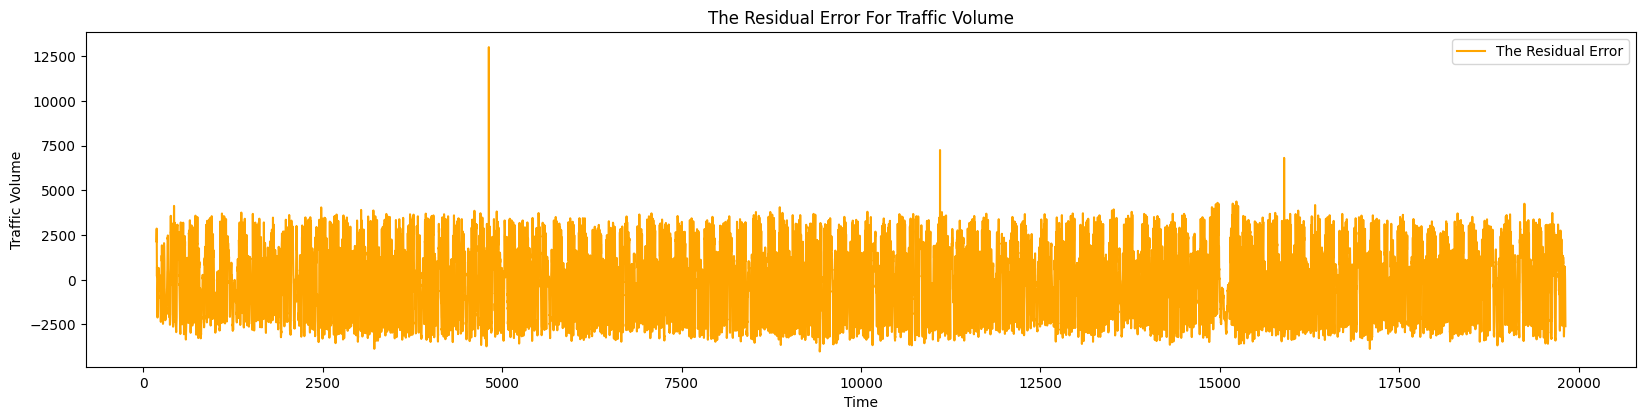

In [15]:
plt.figure(figsize= (20, 20))

plt.subplot(411)
plt.plot(df['traffic_volume'], label= 'Original', color= 'red')
plt.title('The Original Time For Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

plt.figure(figsize= (20, 20))
plt.subplot(412)
plt.plot(trend, label= 'Trend Time', color= 'green')
plt.title('The Trend Time For Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

plt.figure(figsize= (20, 20))
plt.subplot(413)
plt.plot(seasonal, label= 'Seasonal Time', color= 'blue')
plt.title('The Seasonal Time For Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

plt.figure(figsize= (20, 20))
plt.subplot(414)
plt.plot(error, label= 'The Residual Error', color= 'orange')
plt.title('The Residual Error For Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

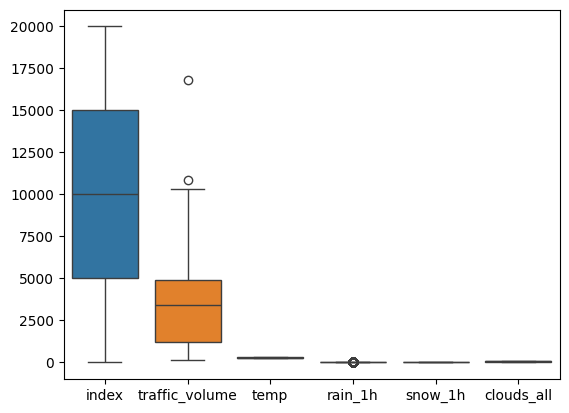

In [16]:
sns.boxplot(data= df)

In [17]:
!pip install feature-engine

In [18]:
df.drop(columns= ['rain_1h', 'snow_1h'], inplace = True)

In [19]:
from feature_engine.outliers import OutlierTrimmer

trimmer = OutlierTrimmer(capping_method= 'iqr')
df = trimmer.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

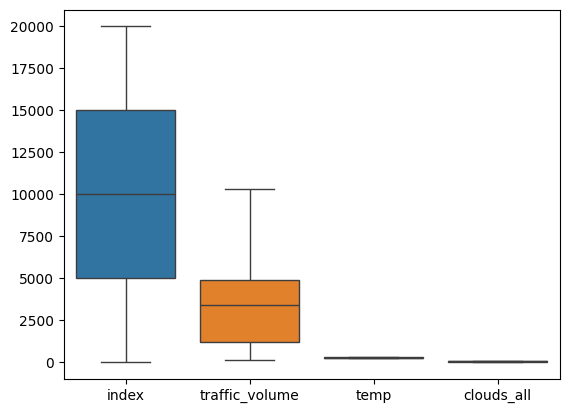

In [20]:
sns.boxplot(data= df)

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [21]:
df.isnull().sum()

,0
index,0
traffic_volume,0
temp,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [22]:
df = df.drop(columns= 'index')

In [23]:
df.head()

,traffic_volume,temp,clouds_all,weather_main,weather_description,date_time
0,4872.0,274.08,90,Snow,heavy snow,2016-11-18 15:00:00
1,4872.0,274.08,90,Fog,fog,2016-11-18 15:00:00
2,4872.0,274.08,90,Mist,mist,2016-11-18 15:00:00
3,5074.0,273.84,90,Fog,fog,2016-11-18 16:00:00
4,5074.0,273.84,90,Mist,mist,2016-11-18 16:00:00


Text(0.5, 1.0, 'The Correlation Between Variables')

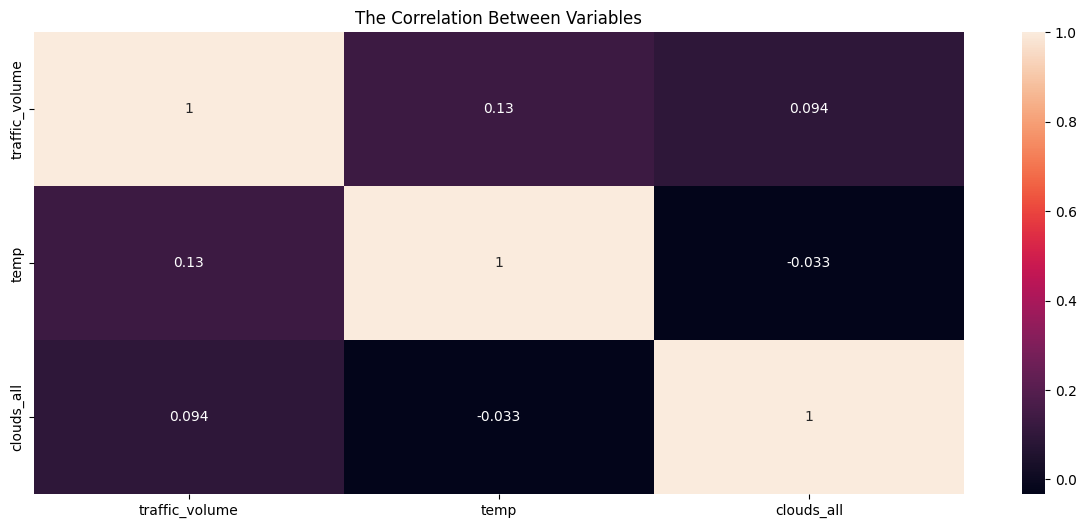

In [24]:
num_col = df.select_dtypes(include= ['number'])

plt.figure(figsize= (15, 6))
sns.heatmap(data = num_col.corr(), annot= True)
plt.title('The Correlation Between Variables')

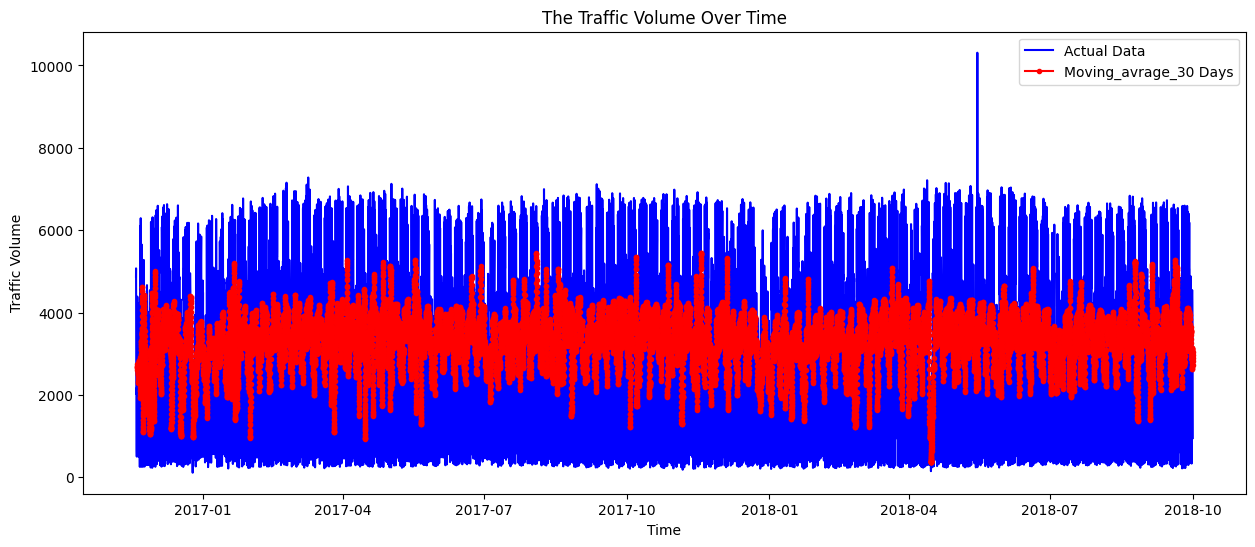

In [25]:
plt.figure(figsize= (15, 6))
plt.plot(df['date_time'], df['traffic_volume'], label= 'Actual Data', color= 'blue')
plt.plot(df['date_time'], df['traffic_volume'].rolling(window= 30).mean(), label= 'Moving_avrage_30 Days', color= 'red', marker= '.')
plt.title('The Traffic Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

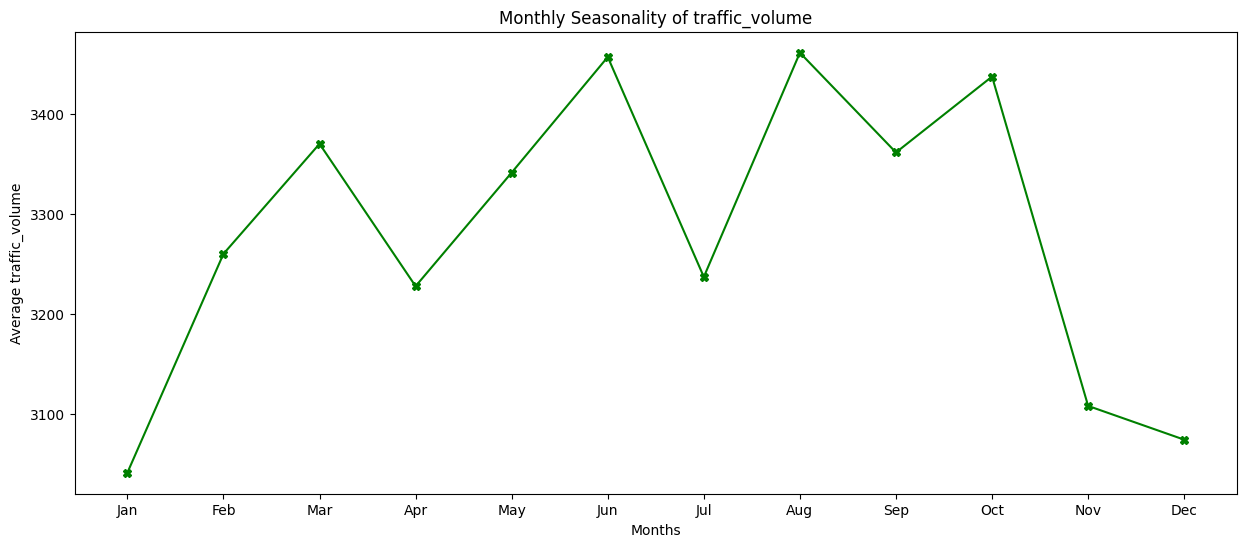

In [26]:
df['Month'] = df['date_time'].dt.month

monthly_average = df.groupby('Month')['traffic_volume'].mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_average.index, monthly_average.values, marker='X', color = 'green')
plt.title('Monthly Seasonality of traffic_volume')
plt.xlabel('Months')
plt.ylabel('Average traffic_volume')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

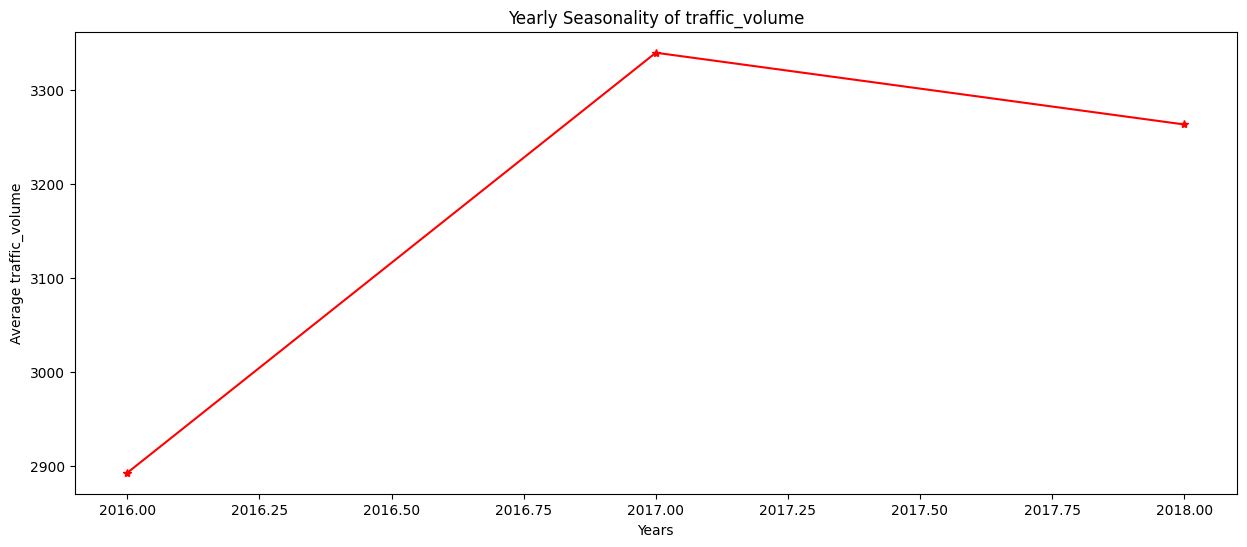

In [27]:
df['Year'] = df['date_time'].dt.year

yearly_average = df.groupby('Year')['traffic_volume'].mean()

plt.figure(figsize=(15, 6))
plt.plot(yearly_average.index, yearly_average.values, marker='*', color= 'red')
plt.title('Yearly Seasonality of traffic_volume')
plt.xlabel('Years')
plt.ylabel('Average traffic_volume')
plt.show()

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [28]:
df['prev_traffic_volume'] = df['date_time'].shift(1)
df['Diff_traffic_volume'] = df['traffic_volume'].diff()
df['Day_Of_Week'] = df['date_time'].dt.dayofweek
df['Day_of_the_year'] = df['date_time'].dt.dayofyear

In [29]:
df.head()

,traffic_volume,temp,clouds_all,weather_main,weather_description,date_time,Month,Year,prev_traffic_volume,Diff_traffic_volume,Day_Of_Week,Day_of_the_year
0,4872.0,274.08,90,Snow,heavy snow,2016-11-18 15:00:00,11,2016,NaT,NaN,4,323
1,4872.0,274.08,90,Fog,fog,2016-11-18 15:00:00,11,2016,2016-11-18 15:00:00,0.0,4,323
2,4872.0,274.08,90,Mist,mist,2016-11-18 15:00:00,11,2016,2016-11-18 15:00:00,0.0,4,323
3,5074.0,273.84,90,Fog,fog,2016-11-18 16:00:00,11,2016,2016-11-18 15:00:00,202.0,4,323
4,5074.0,273.84,90,Mist,mist,2016-11-18 16:00:00,11,2016,2016-11-18 16:00:00,0.0,4,323


In [30]:
df.dropna(inplace= True)

In [31]:
df.head()

,traffic_volume,temp,clouds_all,weather_main,weather_description,date_time,Month,Year,prev_traffic_volume,Diff_traffic_volume,Day_Of_Week,Day_of_the_year
1,4872.0,274.08,90,Fog,fog,2016-11-18 15:00:00,11,2016,2016-11-18 15:00:00,0.0,4,323
2,4872.0,274.08,90,Mist,mist,2016-11-18 15:00:00,11,2016,2016-11-18 15:00:00,0.0,4,323
3,5074.0,273.84,90,Fog,fog,2016-11-18 16:00:00,11,2016,2016-11-18 15:00:00,202.0,4,323
4,5074.0,273.84,90,Mist,mist,2016-11-18 16:00:00,11,2016,2016-11-18 16:00:00,0.0,4,323
5,5074.0,273.84,90,Snow,heavy snow,2016-11-18 16:00:00,11,2016,2016-11-18 16:00:00,0.0,4,323


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [32]:
df = df.set_index('date_time')

In [33]:
df[:'2017'].iloc[:, 0:1]

,traffic_volume
date_time,
2016-11-18 15:00:00,4872.0
2016-11-18 15:00:00,4872.0
2016-11-18 16:00:00,5074.0
2016-11-18 16:00:00,5074.0
2016-11-18 16:00:00,5074.0
...,...
2017-12-31 19:00:00,2995.0
2017-12-31 20:00:00,2731.0
2017-12-31 21:00:00,2483.0


In [34]:
df['2018':].iloc[:, 0:1]

,traffic_volume
date_time,
2018-01-01 00:00:00,1478.0
2018-01-01 01:00:00,1408.0
2018-01-01 02:00:00,931.0
2018-01-01 03:00:00,585.0
2018-01-01 04:00:00,381.0
...,...
2018-09-30 19:00:00,3543.0
2018-09-30 20:00:00,2781.0
2018-09-30 21:00:00,2159.0


In [35]:
train_data = df[:'2017'].iloc[:, 0:1].values
test_data = df['2018':].iloc[:, 0:1].values


In [36]:
train_data

array([[4872.],
       [4872.],
       [5074.],
       ...,
       [2483.],
       [2041.],
       [1580.]])

In [37]:
test_data

array([[1478.],
       [1408.],
       [ 931.],
       ...,
       [2159.],
       [1450.],
       [ 954.]])

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [38]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [39]:
print(len(train_data))
print(len(test_data))

12048
7949


In [40]:
n_past_steps = 60

X_train, y_train = [], []

for i in range(n_past_steps, len(train_data)):
    X_train.append(train_data[i - n_past_steps:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []

for i in range(n_past_steps, len(test_data)):
  X_test.append(test_data[i - n_past_steps: i, 0])
  y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [41]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [42]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, LSTM, Dense

In [43]:
# I choose RNN and LSTM models

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [44]:
rnn = Sequential()

rnn.add(SimpleRNN(units= 32, return_sequences= True, input_shape= (X_train.shape[1], 1)))
rnn.add(Dropout(0.2))

rnn.add(SimpleRNN(units= 64, return_sequences= True))
rnn.add(Dropout(0.2))

rnn.add(SimpleRNN(units= 64))

rnn.add(Dense(units= 1))

rnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 32)              │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 60, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,617 (61.00 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
rnn.compile(optimizer= 'adam', loss= 'mse')

In [46]:
history = rnn.fit(X_train, y_train,
                  batch_size= 32, epochs= 10, validation_data= (X_test, y_test))

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 73ms/step - loss: 0.1143 - val_loss: 0.0086
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - loss: 0.0131 - val_loss: 0.0081
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - loss: 0.0103 - val_loss: 0.0062
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 66ms/step - loss: 0.0088 - val_loss: 0.0054
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 57ms/step - loss: 0.0078 - val_loss: 0.0055
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - loss: 0.0073 - val_loss: 0.0062
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - loss: 0.0071 - val_loss: 0.0073
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - loss: 0.0084 - val_loss: 0.0063
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - loss: 0.0088 - val_loss: 0.0058


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [47]:
y_train_pred = rnn.predict(X_train)
y_test_pred = rnn.predict(X_test)

print(y_train_pred)
print('-------------------------------')
print(y_test_pred)

375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
[[0.5597758 ]
 [0.5024195 ]
 [0.40747163]
 ...
 [0.34239653]
 [0.30728862]
 [0.24927643]]
-------------------------------
[[0.78509605]
 [0.77707005]
 [0.67767584]
 ...
 [0.3276066 ]
 [0.22319636]
 [0.14226452]]


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [48]:
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE For Train Set: ', mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE For Test Set: ', mse_test)
print('----------------------------------')

#------------------------------------------

mae_train = mean_absolute_error(y_train, y_train_pred)
print('MAE For Train Set: ', mae_train)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('MAE For Test Set: ', mae_test)
print('----------------------------------')

#------------------------------------------

rmse_train = math.sqrt(mse_train)
print('RMSE For Train Set: ', rmse_train)
rmse_test = math.sqrt(mse_test)
print('RMSE For Test Set: ', rmse_test)


MSE For Train Set:  14570493.433910025
MSE For Test Set:  14478508.548560314
----------------------------------
MAE For Train Set:  3357.9691842592956
MAE For Test Set:  3341.467817177611
----------------------------------
RMSE For Train Set:  3817.131571469606
RMSE For Test Set:  3805.0635406731794


In [50]:
df = df.reset_index()

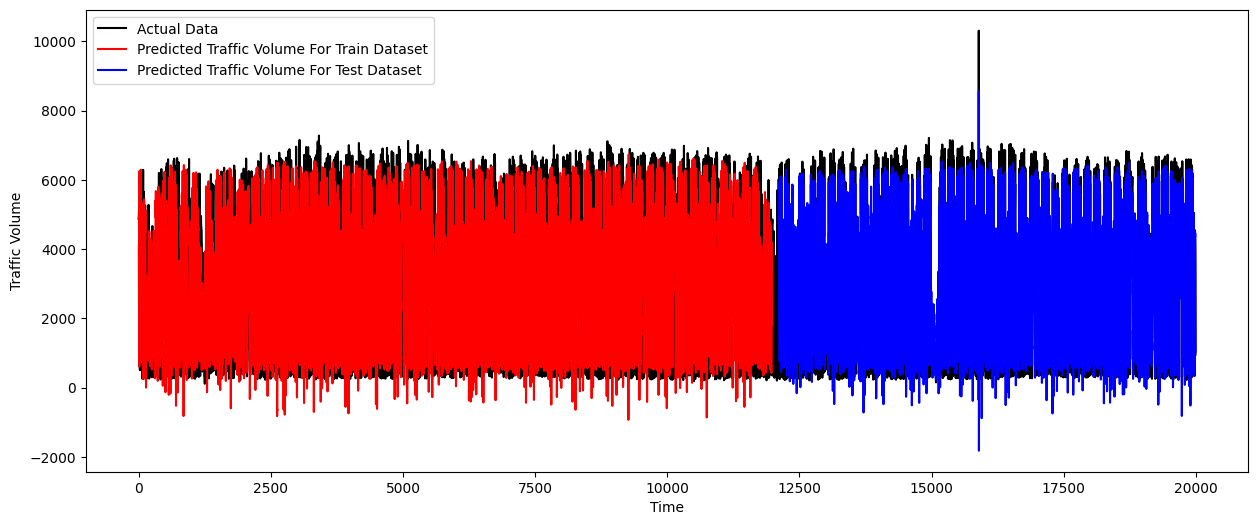

In [51]:
look_back = 1

trainPlot = np.empty_like(df['traffic_volume'].values)
trainPlot[:] = np.nan
trainPlot[look_back: len(y_train_pred) + look_back] = y_train_pred.flatten()


testPlot = np.empty_like(df["traffic_volume"].values)
testPlot[:] = np.nan
test_start = len(train_data) + n_past_steps
testPlot[test_start: test_start + len(y_test_pred)] = y_test_pred.flatten()



plt.figure(figsize=(15, 6))
plt.plot(df["traffic_volume"].values, color='black', label="Actual Data")
plt.plot(trainPlot, color='red', label="Predicted Traffic Volume For Train Dataset")
plt.plot(testPlot, color='blue', label="Predicted Traffic Volume For Test Dataset")

plt.title('')
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()


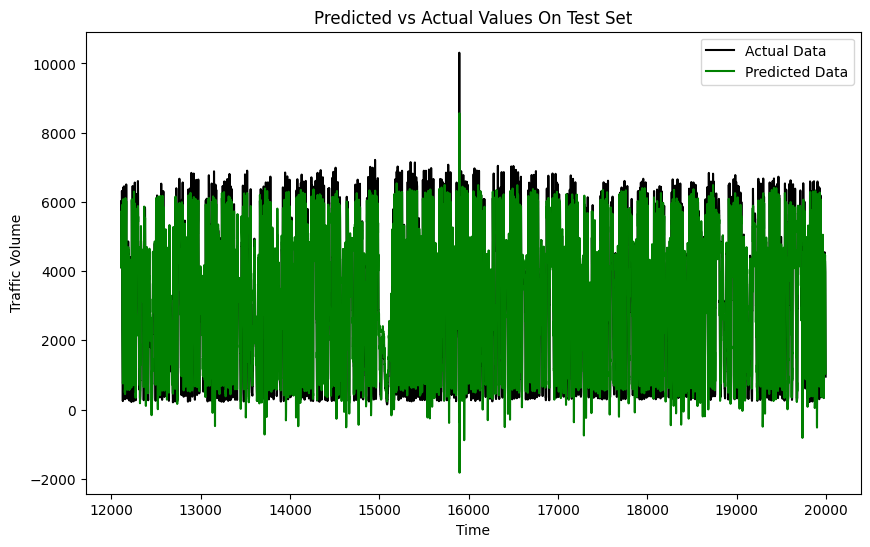

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), color='black', label='Actual Data')
plt.plot(df.index[-len(y_test):], y_test_pred, color='green', label='Predicted Data')
plt.title('Predicted vs Actual Values On Test Set')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


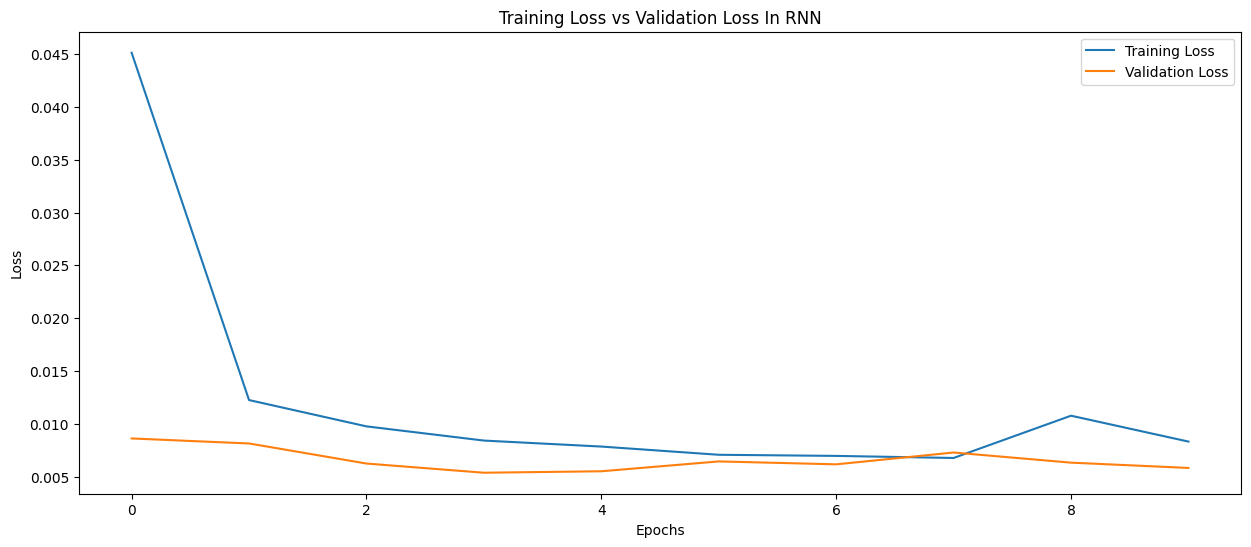

In [53]:
plt.figure(figsize= (15,6))
plt.plot(history.history['loss'], label= 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training Loss vs Validation Loss In RNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [54]:
lstm = Sequential()

lstm.add(LSTM(units= 32, return_sequences= True, input_shape= (X_train.shape[1], 1)))
lstm.add(Dropout(0.2))

lstm.add(LSTM(units= 64, return_sequences= True))
lstm.add(Dropout(0.2))

lstm.add(LSTM(units= 64))

lstm.add(Dense(units= 1))

lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,273 (243.25 KB)

 Trainable params: 62,273 (243.25 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
lstm.compile(optimizer= 'rmsprop', loss= 'mse')

In [56]:
history = lstm.fit(X_train, y_train,
                  batch_size= 32, epochs= 10, validation_data= (X_test, y_test))

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 118ms/step - loss: 0.0635 - val_loss: 0.0236
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 119ms/step - loss: 0.0219 - val_loss: 0.0098
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 116ms/step - loss: 0.0116 - val_loss: 0.0073
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - loss: 0.0090 - val_loss: 0.0100
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - loss: 0.0078 - val_loss: 0.0070
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 114ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 113ms/step - loss: 0.0068 - val_loss: 0.0059
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - loss: 0.0066 - val_loss: 0.0057
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - loss: 0.0063 - val_loss: 0.0065
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 119ms/step - loss: 0.0065 - val_loss: 0.0063


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [57]:
y_train_pred = lstm.predict(X_train)
y_test_pred = lstm.predict(X_test)

print(y_train_pred)
print('-------------------------------')
print(y_test_pred)

375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step
[[0.53532   ]
 [0.46652615]
 [0.3716774 ]
 ...
 [0.3113075 ]
 [0.2751726 ]
 [0.20992213]]
-------------------------------
[[0.83259606]
 [0.77804834]
 [0.6759001 ]
 ...
 [0.28737363]
 [0.19638225]
 [0.09186728]]


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [58]:
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

mse_train = mean_squared_error(y_train, y_train_pred)
print('MSE For Train Set: ', mse_train)
mse_test = mean_squared_error(y_test, y_test_pred)
print('MSE For Test Set: ', mse_test)
print('----------------------------------')

#------------------------------------------

mae_train = mean_absolute_error(y_train, y_train_pred)
print('MAE For Train Set: ', mae_train)
mae_test = mean_absolute_error(y_test, y_test_pred)
print('MAE For Test Set: ', mae_test)
print('----------------------------------')

#------------------------------------------

rmse_train = math.sqrt(mse_train)
print('RMSE For Train Set: ', rmse_train)
rmse_test = math.sqrt(mse_test)
print('RMSE For Test Set: ', rmse_test)


MSE For Train Set:  13311214.111336254
MSE For Test Set:  13261357.61610373
----------------------------------
MAE For Train Set:  3168.8857475951468
MAE For Test Set:  3158.7495154360877
----------------------------------
RMSE For Train Set:  3648.45366029723
RMSE For Test Set:  3641.6146990179686


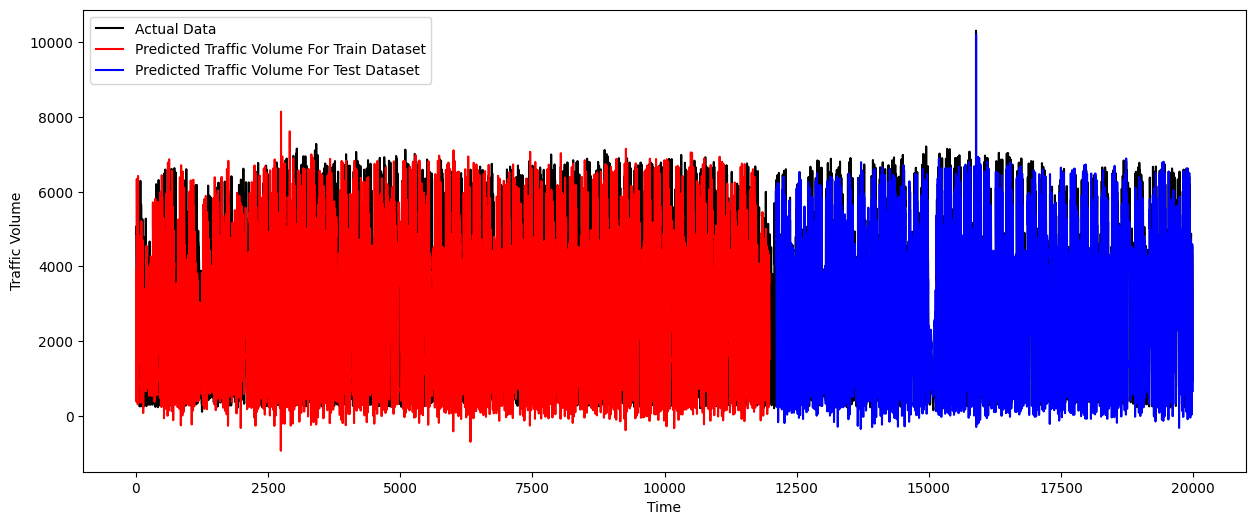

In [60]:
look_back = 1

trainPlot = np.empty_like(df['traffic_volume'].values)
trainPlot[:] = np.nan
trainPlot[look_back: len(y_train_pred) + look_back] = y_train_pred.flatten()


testPlot = np.empty_like(df["traffic_volume"].values)
testPlot[:] = np.nan
test_start = len(train_data) + n_past_steps
testPlot[test_start: test_start + len(y_test_pred)] = y_test_pred.flatten()



plt.figure(figsize=(15, 6))
plt.plot(df["traffic_volume"].values, color='black', label="Actual Data")
plt.plot(trainPlot, color='red', label="Predicted Traffic Volume For Train Dataset")
plt.plot(testPlot, color='blue', label="Predicted Traffic Volume For Test Dataset")

plt.title('')
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()


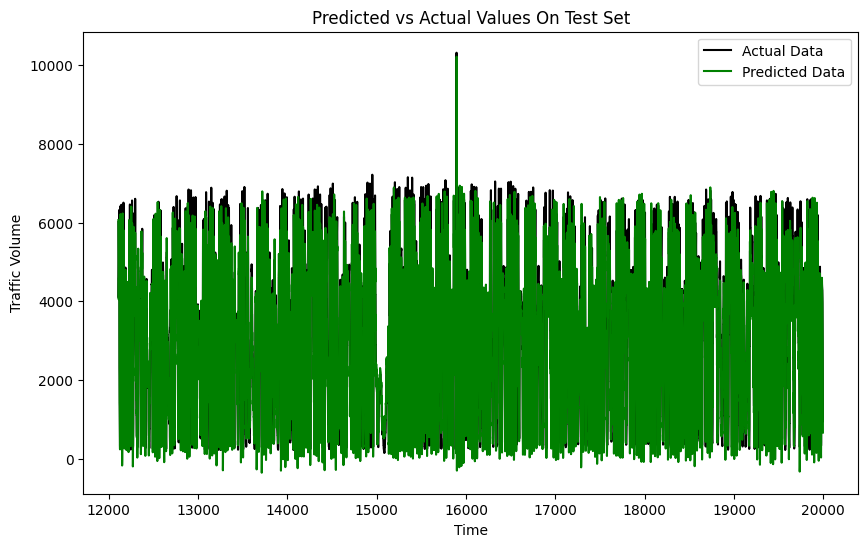

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), color='black', label='Actual Data')
plt.plot(df.index[-len(y_test):], y_test_pred, color='green', label='Predicted Data')
plt.title('Predicted vs Actual Values On Test Set')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


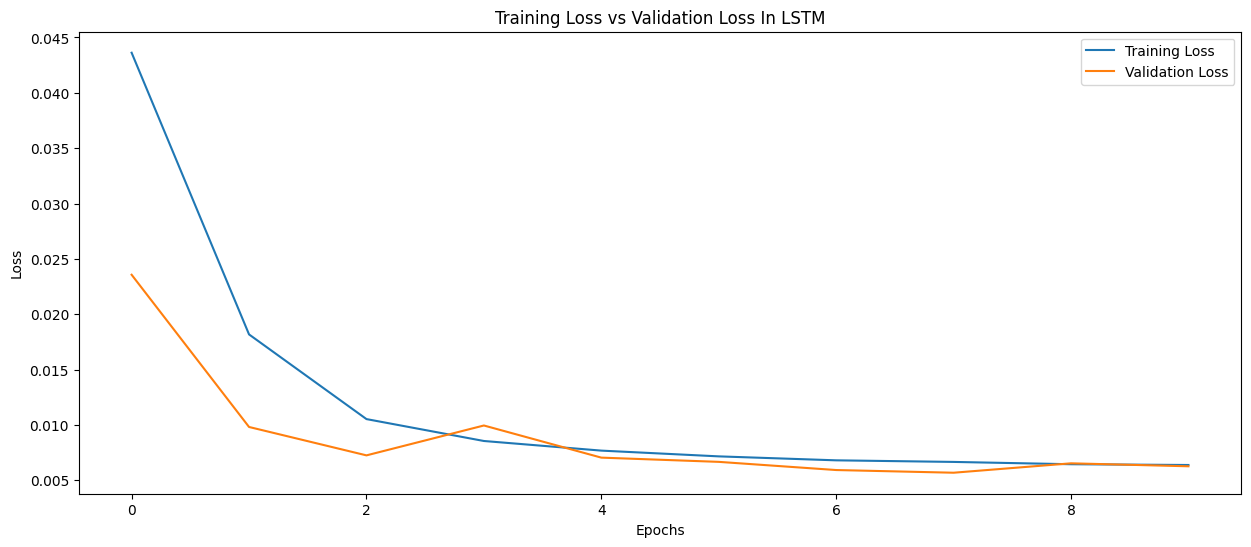

In [62]:
plt.figure(figsize= (15,6))
plt.plot(history.history['loss'], label= 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training Loss vs Validation Loss In LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

**Q1: Data Preprocessing: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?**

A1: I handled missing values by fill the target column with Mean, I see it is satuable for it and dealling with numrical columns
Also, I scale the data by using MinMax scaler to be more effictive to feed it to my model

**Q2: Feature Engineering: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.**

A2: I created some fetures like (month, year, previous day by shifting one value, day of week , day of year and the diffrence for the target column).
I think they will be useful for Time series analysis

**Q3: Model Architecture: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?**

A3: I used two models: RNN and LSTM becuse they work good with forcating the time in the feature
for each RNN and LSTM I used the same articure :
number of layers: 1 layer for input, 2 hidden layers and 1 for output
I used also dropout for prevent the overfitting during training process
the activation function by defult is tanh

**Q4: Training Process: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?**

A4: The batch size is 32 and it is good in general, number of epochs is 10 and it give me good loss values be decresing it and it is satuable for the lenght of my data
for the optimizer I used Adam in RNN and rmsprop for LSTM

**Q5: Loss Function and Metrics: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?**

A5: I use MSE as loss function

**Q7: Overfitting and Underfitting: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?**

A7: the result is good for both models, and they do not have any overfitting
I apply dropput for some layers to prevent the overfitting during training process

**Q8: Future Improvements: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.**

A8: I think if we try more models and see the good results from them, we can take the best of two and apply ensemple technique to make the accuracy more good
